> TODO: standardize pending job > finished job attributes.
  - inactive
  - active
  - finished
- [ ] change all `assert` to `raise Exception...`
- [ ] type-hint everywhere.
- [ ] redo all docstrings.
- [ ] cleanup logging output.

# ezpq

> easy parallel queue

## Overview

`ezpq` is a Python module that serves as an abstraction layer to both `multiprocessing.Process` and `threading.Thread` that offers:
- a unified API for parallel processing using multiprocessing or threading.
- FIFO priority queueing.
- methods for generating plots.
- `tqdm` integration for progress-bars.
- error-handling, logging.
- cross-platform compatibility.

This project is:
- free, open-source
- **fun**ctional
- interesting
- all I need it to be

This project is **not**:
- extensively tested
- super-clean
- thoroughly documented

Bug reports and MRs are welcome, though I don't imagine any major enhancements; just enough to keep tests passing.

## Install

From PyPi: `pip install ezpq[plot]`

From source: `git clone ... && pip install .`

Run tests from source: `make test`

Build this README with Jupyter: `make builddocs`

## Examples

> imports.

In [1]:
import ezpq
import threading
import multiprocessing as mp
import time

> minimal example.

3 workers, 18 jobs, each job takes 1 second:

100%|██████████| 18/18 [00:06<00:00,  2.79op/s]


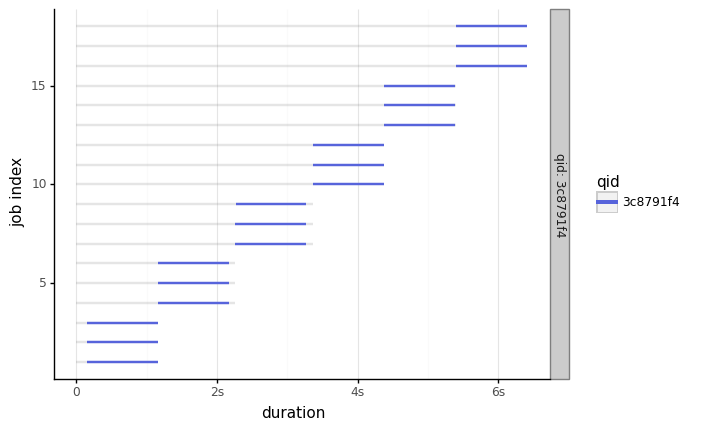

<ggplot: (-9223371917279599100)>

In [3]:
with ezpq.Queue(
    max_concurrent=3,
    engine=threading.Thread,  # or `mp.Process`
    show_progress=True
) as queue:

    # put, wait, collect.
    finished = queue.map(time.sleep, [1] * 18, show_progress=True)

# plot.
ezpq.Plot(finished).build()

> minimal example with decorator.

Same as above, but using the @decorator interface.

100%|██████████| 18/18 [00:06<00:00,  2.70op/s]


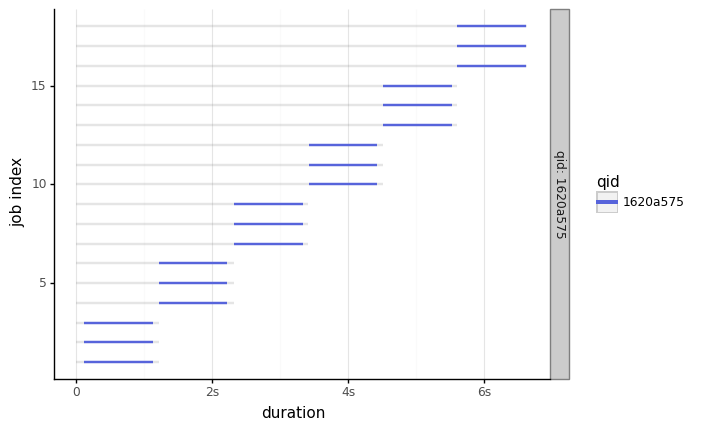

<ggplot: (-9223371917280416476)>

In [5]:
# define.
@ezpq.Queue(
    max_concurrent=3,
    engine=threading.Thread,  # or `mp.Process`
    show_progress=True
)
def time_sleep(x):
    time.sleep(x)

# call and collect.
finished = time_sleep([1] * 18)

# plot.
ezpq.Plot(finished).build()

> verbose form.

`map` is an abstraction to:
1. `put`
2. `wait`
3. `collect` (or `get`)

In addition to using the verbose form, the example below also flips the priority for every-other-job.

100%|██████████| 18/18 [00:06<00:00,  2.78op/s]


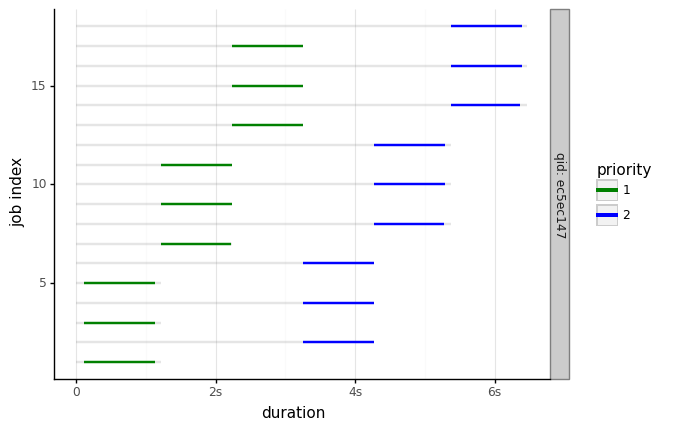

<ggplot: (-9223371917277144504)>

In [7]:
with ezpq.Queue(
    max_concurrent=3,
    engine=threading.Thread,  # or `mp.Process`
    show_progress=True
) as queue:

    # put.
    for i in range(18):
        queue.put(time.sleep, 1, priority=(i%2)+1)
    
    # wait.
    queue.wait()

    # collect.
    finished = queue.collect()

# plot.
ezpq.Plot(finished).build(color_by='priority', color_pal=['green', 'blue'])

For more examples, view the [tests](tests/EzpqTestCases.py) and docstrings.